In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten,Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

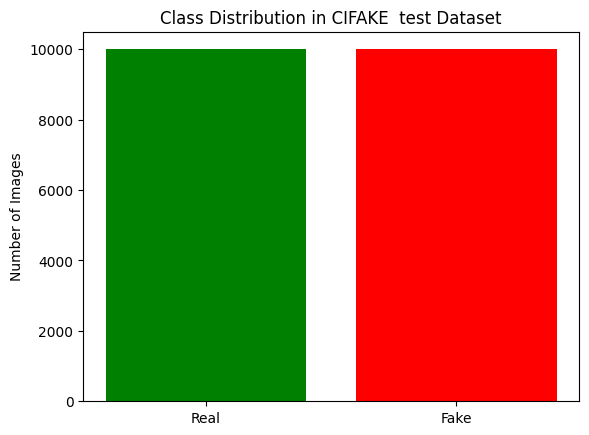

In [2]:
import os
import matplotlib.pyplot as plt

real_dir = "/kaggle/input/cifake-dataset/test/REAL"
fake_dir = "/kaggle/input/cifake-dataset/test/FAKE"

real_count = len(os.listdir(real_dir))
fake_count = len(os.listdir(fake_dir))

plt.bar(['Real', 'Fake'], [real_count, fake_count], color=['green', 'red'])
plt.title("Class Distribution in CIFAKE  test Dataset")
plt.ylabel("Number of Images")
plt.show()


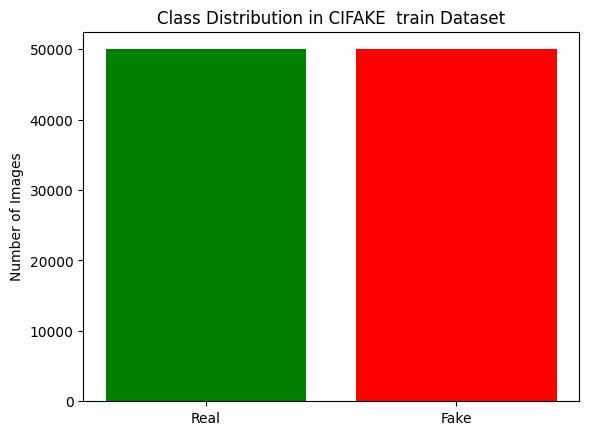

In [3]:
import os
import matplotlib.pyplot as plt

real_dir = "/kaggle/input/cifake-dataset/train/REAL"
fake_dir = "/kaggle/input/cifake-dataset/train/FAKE"

real_count = len(os.listdir(real_dir))
fake_count = len(os.listdir(fake_dir))

plt.bar(['Real', 'Fake'], [real_count, fake_count], color=['green', 'red'])
plt.title("Class Distribution in CIFAKE  train Dataset")
plt.ylabel("Number of Images")
plt.show()


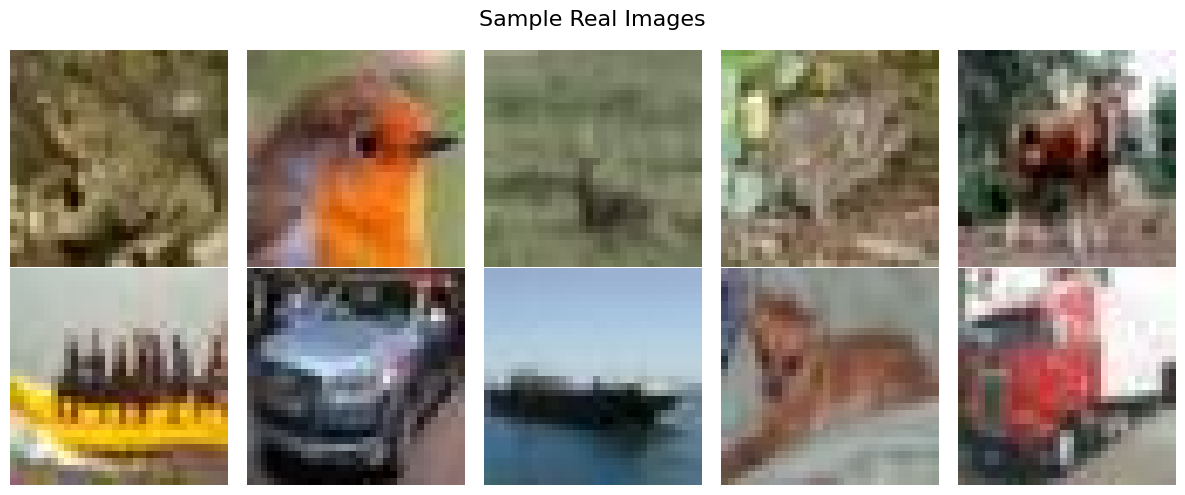

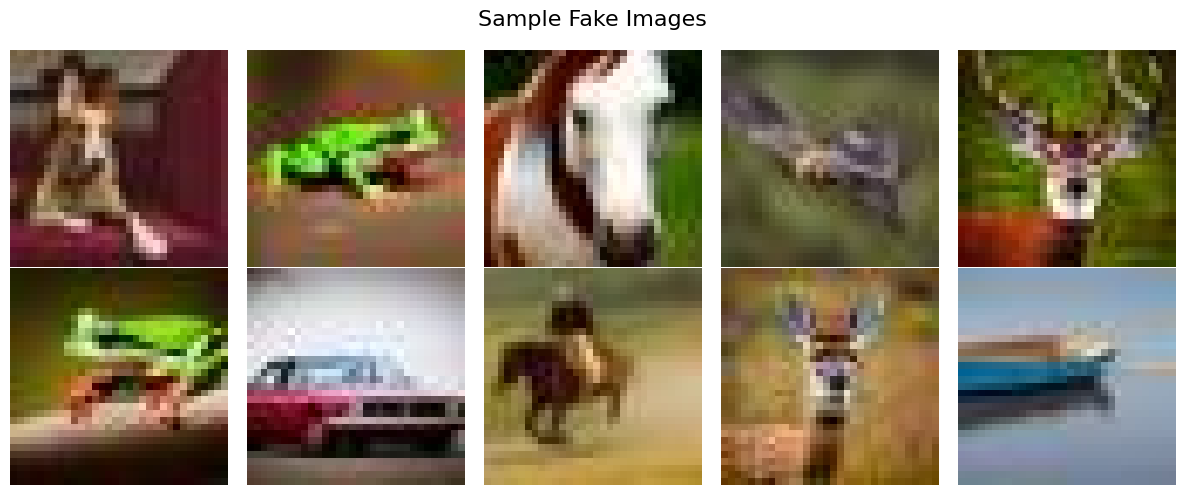

In [5]:
import cv2
import numpy as np

def show_images_grid(img_dir, title, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    img_names = os.listdir(img_dir)[:rows*cols]
    for i, img_name in enumerate(img_names):
        img = cv2.imread(os.path.join(img_dir, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax = axes[i // cols, i % cols]
        ax.imshow(img)
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display real and fake samples
show_images_grid(real_dir, "Sample Real Images")
show_images_grid(fake_dir, "Sample Fake Images")


In [6]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Load training dataset
train_dataset = ImageFolder(root='/kaggle/input/cifake-dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load test dataset
test_dataset = ImageFolder(root='/kaggle/input/cifake-dataset/test', transform=transform)

# Split into Test-1 and Test-2 (40% clean, 60% for adversarial)
test1_size = int(0.4 * len(test_dataset))
test2_size = len(test_dataset) - test1_size
test1_dataset, test2_dataset = random_split(test_dataset, [test1_size, test2_size])
test1_loader = DataLoader(test1_dataset, batch_size=64, shuffle=False)
test2_loader = DataLoader(test2_dataset, batch_size=64, shuffle=False)

In [8]:
class SimpleCNN(nn.Module):
    def _init_(self):
        super(SimpleCNN, self)._init_()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        return self.model(x)

model = SimpleCNN().to(device)

In [9]:
'''import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score
from tqdm import tqdm'''
# Example model definition (replace this with your actual model)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 16 * 16, 2)  # Assuming input size 32x32

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate and move model to device
model = SimpleCNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(train_loader):.4f}")
''''transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])  # Imagenet mean/std
])'''



100%|██████████| 1563/1563 [10:40<00:00,  2.44it/s]


Epoch [1/10], Loss: 0.3642


100%|██████████| 1563/1563 [02:55<00:00,  8.92it/s]


Epoch [2/10], Loss: 0.2835


100%|██████████| 1563/1563 [02:20<00:00, 11.16it/s]


Epoch [3/10], Loss: 0.2588


100%|██████████| 1563/1563 [02:26<00:00, 10.63it/s]


Epoch [4/10], Loss: 0.2455


100%|██████████| 1563/1563 [04:23<00:00,  5.94it/s]


Epoch [5/10], Loss: 0.2365


100%|██████████| 1563/1563 [04:26<00:00,  5.86it/s]


Epoch [6/10], Loss: 0.2283


100%|██████████| 1563/1563 [05:22<00:00,  4.84it/s]


Epoch [7/10], Loss: 0.2225


100%|██████████| 1563/1563 [04:33<00:00,  5.72it/s]


Epoch [8/10], Loss: 0.2169


100%|██████████| 1563/1563 [04:13<00:00,  6.16it/s]


Epoch [9/10], Loss: 0.2114


100%|██████████| 1563/1563 [04:44<00:00,  5.49it/s]

Epoch [10/10], Loss: 0.2082


"'transform = transforms.Compose([\n    transforms.Resize((224, 224)),  # ResNet input size\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], \n                         [0.229, 0.224, 0.225])  # Imagenet mean/std\n])"

In [12]:
train_path = '/kaggle/input/cifake-dataset/train'
test_path = '/kaggle/input/cifake-dataset/test'

train_data = datasets.ImageFolder(train_path, transform=transform)
test_data = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Split test into test-1 (40%) and test-2 (60%)
test1_len = int(0.4 * len(test_data))
test2_len = len(test_data) - test1_len
test1_data, test2_data = random_split(test_data, [test1_len, test2_len])

test1_loader = DataLoader(test1_data, batch_size=64, shuffle=False)
test2_loader = DataLoader(test2_data, batch_size=64, shuffle=False)


In [13]:
# Fast Gradient Sign Method (FGSM)
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    return image + epsilon * sign_data_grad

def generate_adversarial_examples(model, data_loader, epsilon=0.1):
    model.eval()
    adv_images = []
    adv_labels = []

    for images, labels in tqdm(data_loader):
        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True
        outputs = model(images)
        loss = criterion(outputs, labels)
        model.zero_grad()
        loss.backward()
        data_grad = images.grad.data
        perturbed_data = fgsm_attack(images, epsilon, data_grad)
        adv_images.append(perturbed_data.detach().cpu())
        adv_labels.append(labels.detach().cpu())

    adv_dataset = torch.utils.data.TensorDataset(torch.cat(adv_images), torch.cat(adv_labels))
    return DataLoader(adv_dataset, batch_size=64, shuffle=False)

# Create perturbed test2_loader
adv_test2_loader = generate_adversarial_examples(model, test2_loader, epsilon=0.1)
'''
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)'''

100%|██████████| 188/188 [01:21<00:00,  2.30it/s]


'\ncriterion = nn.CrossEntropyLoss(label_smoothing=0.1)\noptimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)\nscheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)'

In [14]:
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

In [20]:
from sklearn.metrics import precision_score

def evaluate(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision = precision_score(all_labels, all_preds, average='macro')
    return precision
   


In [27]:
train_losses = []
train_accuracies = []

for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/10], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


100%|██████████| 1563/1563 [06:08<00:00,  4.24it/s]


Epoch [1/10], Loss: 0.2012, Accuracy: 0.9198


100%|██████████| 1563/1563 [03:36<00:00,  7.23it/s]


Epoch [2/10], Loss: 0.1972, Accuracy: 0.9223


100%|██████████| 1563/1563 [02:52<00:00,  9.06it/s]


Epoch [3/10], Loss: 0.1940, Accuracy: 0.9233


100%|██████████| 1563/1563 [02:53<00:00,  9.01it/s]


Epoch [4/10], Loss: 0.1949, Accuracy: 0.9226


100%|██████████| 1563/1563 [02:33<00:00, 10.20it/s]

Epoch [5/10], Loss: 0.1913, Accuracy: 0.9245


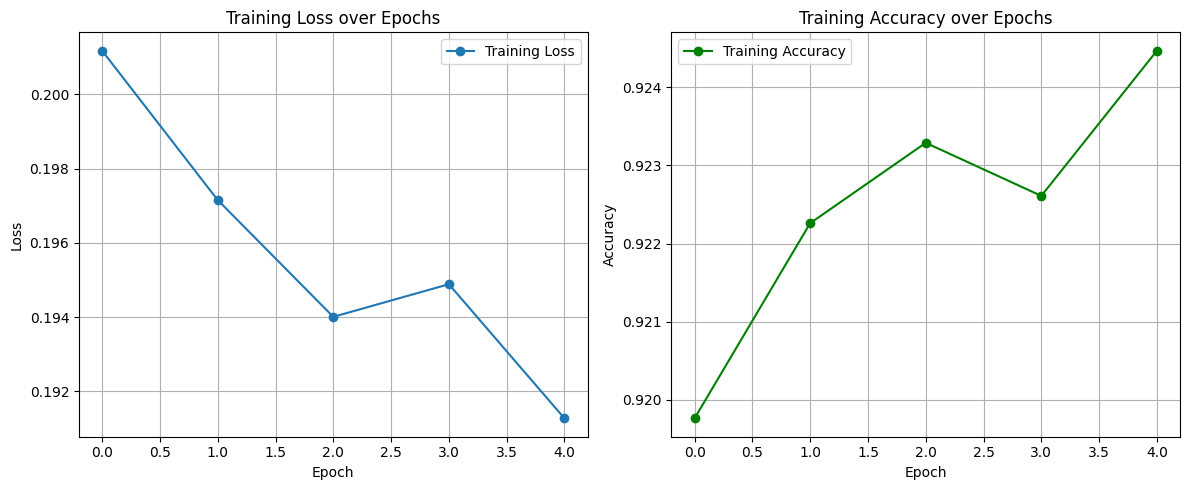

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
def fgsm_train(model, images, labels, epsilon=0.1):
    images.requires_grad = True
    outputs = model(images)
    loss = criterion(outputs, labels)
    model.zero_grad()
    loss.backward()
    data_grad = images.grad.data
    perturbed_data = fgsm_attack(images, epsilon, data_grad)
    return perturbed_data.detach()

# New Training Loop with Adversarial Training
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Generate adversarial images
        adv_images = fgsm_train(model, images.clone(), labels, epsilon=0.1)

        # Combine clean + adversarial examples
        combined_images = torch.cat([images, adv_images])
        combined_labels = torch.cat([labels, labels])

        optimizer.zero_grad()
        outputs = model(combined_images)
        loss = criterion(outputs, combined_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == combined_labels).sum().item()
        total += combined_labels.size(0)

    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")


100%|██████████| 1563/1563 [04:46<00:00,  5.46it/s]


Epoch [1/10], Loss: 1.1762, Accuracy: 0.5305


100%|██████████| 1563/1563 [05:28<00:00,  4.76it/s]


Epoch [2/10], Loss: 0.6804, Accuracy: 0.5850


100%|██████████| 1563/1563 [05:22<00:00,  4.85it/s]


Epoch [3/10], Loss: 0.6655, Accuracy: 0.6074


100%|██████████| 1563/1563 [04:52<00:00,  5.35it/s]


Epoch [4/10], Loss: 0.6532, Accuracy: 0.6278


100%|██████████| 1563/1563 [05:21<00:00,  4.86it/s]


Epoch [5/10], Loss: 0.6399, Accuracy: 0.6481


100%|██████████| 1563/1563 [06:44<00:00,  3.87it/s]


Epoch [6/10], Loss: 0.6299, Accuracy: 0.6605


100%|██████████| 1563/1563 [07:08<00:00,  3.65it/s]


Epoch [7/10], Loss: 0.6205, Accuracy: 0.6732


100%|██████████| 1563/1563 [05:01<00:00,  5.19it/s]


Epoch [8/10], Loss: 0.6114, Accuracy: 0.6832


100%|██████████| 1563/1563 [04:10<00:00,  6.25it/s]


Epoch [9/10], Loss: 0.5915, Accuracy: 0.7042


100%|██████████| 1563/1563 [03:58<00:00,  6.56it/s]

Epoch [10/10], Loss: 0.5821, Accuracy: 0.7155


In [30]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize to [-1, 1]
])


In [31]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

model = ImprovedCNN().to(device)


In [32]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)


In [19]:
precision_test1 = evaluate(model, test1_loader)
precision_test2 = evaluate(model, adv_test2_loader)

print(f"Precision on Test-1 (Clean): {precision_test1:.4f}")
print(f"Precision on Test-2 (Adversarial): {precision_test2:.4f}")

Precision on Test-1 (Clean): 0.9085
Precision on Test-2 (Adversarial): 0.0004


In [33]:
precision_test1 = evaluate(model, test1_loader)
precision_test2 = evaluate(model, adv_test2_loader)

print(f"Precision on Test-1 (Clean): {precision_test1:.4f}")
print(f"Precision on Test-2 (Adversarial): {precision_test2:.4f}")


Precision on Test-1 (Clean): 0.6709
Precision on Test-2 (Adversarial): 0.6045
